# **Telecom X - Análisis de Evasión de Clientes**

La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Deberas recopilar, procesar y analizar los datos, para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

Para ello, deberas:

- ✅ Importar y manipular datos desde una API de manera eficiente.
- ✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
- ✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.
- ✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

## **Extracción de Datos**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
data = pd.read_json(url)
data

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [9]:
pd.json_normalize(data.iloc[:,2])

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [10]:
normalize_data = [pd.json_normalize(data.iloc[:,i]) for i in range(2,len(data.columns))]

In [11]:
clean_data = data.iloc[:,0:2]
clean_data = pd.concat([clean_data,*normalize_data],axis=1) 
clean_data

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [12]:
# clean_data.to_csv('analisis_evasion_clientes.csv',index=False)
# pd.read_csv('analisis_evasion_clientes.csv')

## **Transformación de Datos**

### Verificando sus tipos de datos e Identificando las columnas más relevantes para el análisis de evasión.


In [13]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías.
 

In [14]:
# Verificando valores nulos
clean_data.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [15]:
# Verificando valores duplicados
clean_data['customerID'].unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], shape=(7267,), dtype=object)

In [16]:
# Verificando erroes de formato e inconsistencias
for i in clean_data.columns:
    print(f'{i} ->  {clean_data[i].unique()}')

customerID ->  ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn ->  ['No' 'Yes' '']
gender ->  ['Female' 'Male']
SeniorCitizen ->  [0 1]
Partner ->  ['Yes' 'No']
Dependents ->  ['Yes' 'No']
tenure ->  [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService ->  ['Yes' 'No']
MultipleLines ->  ['No' 'Yes' 'No phone service']
InternetService ->  ['DSL' 'Fiber optic' 'No']
OnlineSecurity ->  ['No' 'Yes' 'No internet service']
OnlineBackup ->  ['Yes' 'No' 'No internet service']
DeviceProtection ->  ['No' 'Yes' 'No internet service']
TechSupport ->  ['Yes' 'No' 'No internet service']
StreamingTV ->  ['Yes' 'No' 'No internet service']
StreamingMovies ->  ['No' 'Yes' 'No internet service']
Contract ->  ['One year' 'Month-to-month' 'Two year']
PaperlessBilling ->  ['Yes' 'No']

In [17]:
clean_data = clean_data.replace('No .+','No',regex=True)

In [18]:
for i in clean_data.columns:
    print(f'{i} ->  {clean_data[i].unique()}')

customerID ->  ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn ->  ['No' 'Yes' '']
gender ->  ['Female' 'Male']
SeniorCitizen ->  [0 1]
Partner ->  ['Yes' 'No']
Dependents ->  ['Yes' 'No']
tenure ->  [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService ->  ['Yes' 'No']
MultipleLines ->  ['No' 'Yes']
InternetService ->  ['DSL' 'Fiber optic' 'No']
OnlineSecurity ->  ['No' 'Yes']
OnlineBackup ->  ['Yes' 'No']
DeviceProtection ->  ['No' 'Yes']
TechSupport ->  ['Yes' 'No']
StreamingTV ->  ['Yes' 'No']
StreamingMovies ->  ['No' 'Yes']
Contract ->  ['One year' 'Month-to-month' 'Two year']
PaperlessBilling ->  ['Yes' 'No']
PaymentMethod ->  ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Monthly ->  [65.6  59.9  73.9  ..

In [19]:
clean_data[clean_data['Charges.Total']==' ']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No,No,No,No,No,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No,No,No,No,No,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No,No,No,No,No,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No,No,No,No,No,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No,No,No,No,No,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [20]:
clean_data['Charges.Total'] = clean_data['Charges.Total'].replace(' ',0)
clean_data['Charges.Total'] = clean_data['Charges.Total'].astype(np.float64)

In [21]:
clean_data['cuenta_diaria'] = clean_data['Charges.Monthly']/30

### **Cuenta Diaria**

In [22]:
clean_data.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,cuenta_diaria
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


### **Estandarización**

In [23]:
clean_data.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'cuenta_diaria'],
      dtype='object')

In [24]:
clean_data.columns = ['id','contrato_cancelado','genero','cliente_tercera_edad','conyugue','dependientes','antiguedad(meses)','servicio_telefonico','multilinea','servicio_internet','seguridad_online','respaldos','proteccion_dispositivos','soporte_tecnico','streaming_TV','streaming_movies','tipo_contrato','factura_digital','metodo_pago','cargo_mensual','total_pagado','cuenta_diaria']

In [25]:
clean_data

,id,contrato_cancelado,genero,cliente_tercera_edad,conyugue,dependientes,antiguedad(meses),servicio_telefonico,multilinea,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,streaming_TV,streaming_movies,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,total_pagado,cuenta_diaria
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [26]:
clean_data = clean_data.replace('Yes',True)
clean_data = clean_data.replace('No',False)


/tmp/ipykernel_10409/4158820978.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_data = clean_data.replace('No',False)


In [27]:
clean_data['cliente_tercera_edad'] = clean_data['cliente_tercera_edad'].replace(0,False)
clean_data['cliente_tercera_edad'] = clean_data['cliente_tercera_edad'].replace(1,True)
clean_data['cliente_tercera_edad'].unique()

/tmp/ipykernel_10409/2638863565.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_data['cliente_tercera_edad'] = clean_data['cliente_tercera_edad'].replace(1,True)


array([False,  True])

In [28]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7267 non-null   object 
 1   contrato_cancelado       7267 non-null   object 
 2   genero                   7267 non-null   object 
 3   cliente_tercera_edad     7267 non-null   bool   
 4   conyugue                 7267 non-null   bool   
 5   dependientes             7267 non-null   bool   
 6   antiguedad(meses)        7267 non-null   int64  
 7   servicio_telefonico      7267 non-null   bool   
 8   multilinea               7267 non-null   bool   
 9   servicio_internet        7267 non-null   object 
 10  seguridad_online         7267 non-null   bool   
 11  respaldos                7267 non-null   bool   
 12  proteccion_dispositivos  7267 non-null   bool   
 13  soporte_tecnico          7267 non-null   bool   
 14  streaming_TV            

In [29]:
clean_data.rename(columns={'servicio_internet':'tipo_conexion'},inplace=True)


In [30]:
clean_data['servicio_internet'] = [i if i is False else True for i in clean_data['tipo_conexion']]

In [31]:
clean_data['tipo_conexion'] = clean_data['tipo_conexion'].replace(False,'sin conexion')

In [32]:
clean_data

,id,contrato_cancelado,genero,cliente_tercera_edad,conyugue,dependientes,antiguedad(meses),servicio_telefonico,multilinea,tipo_conexion,...,soporte_tecnico,streaming_TV,streaming_movies,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,total_pagado,cuenta_diaria,servicio_internet
0,0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,...,True,True,False,One year,True,Mailed check,65.60,593.30,2.186667,True
1,0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,...,False,False,True,Month-to-month,False,Mailed check,59.90,542.40,1.996667,True
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,False,False,False,Month-to-month,True,Electronic check,73.90,280.85,2.463333,True
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85,3.266667,True
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,True,True,False,Month-to-month,True,Mailed check,83.90,267.40,2.796667,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Female,False,False,False,13,True,False,DSL,...,True,False,False,One year,False,Mailed check,55.15,742.90,1.838333,True
7263,9992-RRAMN,True,Male,False,True,False,22,True,True,Fiber optic,...,False,False,True,Month-to-month,True,Electronic check,85.10,1873.70,2.836667,True
7264,9992-UJOEL,False,Male,False,False,False,2,True,False,DSL,...,False,False,False,Month-to-month,True,Mailed check,50.30,92.75,1.676667,True
7265,9993-LHIEB,False,Male,False,True,True,67,True,False,DSL,...,True,False,True,Two year,False,Mailed check,67.85,4627.65,2.261667,True


In [33]:
clean_data.insert(clean_data.columns.get_loc('tipo_conexion'),'servicio_internet',clean_data.pop('servicio_internet'))
clean_data.head()


,id,contrato_cancelado,genero,cliente_tercera_edad,conyugue,dependientes,antiguedad(meses),servicio_telefonico,multilinea,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,streaming_TV,streaming_movies,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,total_pagado,cuenta_diaria
0,0002-ORFBO,False,Female,False,True,True,9,True,False,True,...,False,True,True,False,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,False,False,False,9,True,True,True,...,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,True,...,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,True,True,False,13,True,False,True,...,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,True,...,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,2.796667


## **Carga y análisis(L - Load & Analysis)**

In [34]:
df = clean_data.copy()

In [ ]:
# df.to_csv('clean_data_evasion_clientes.csv',index=False)

#### **Exploracion de medidas de Tendencia Central**

In [35]:
df.describe()

,antiguedad(meses),cargo_mensual,total_pagado,cuenta_diaria
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157337
std,24.571773,30.129572,2268.648587,1.004319
min,0.000000,18.250000,0.000000,0.608333
25%,9.000000,35.425000,396.200000,1.180833
50%,29.000000,70.300000,1389.200000,2.343333
75%,55.000000,89.875000,3778.525000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


In [36]:
df.describe(include=['O'])

,id,contrato_cancelado,genero,tipo_conexion,tipo_contrato,metodo_pago
count,7267,7267,7267,7267,7267,7267
unique,7267,3,2,3,3,4
top,9995-HOTOH,False,Male,Fiber optic,Month-to-month,Electronic check
freq,1,5174,3675,3198,4005,2445


#### **Panorama de cartera de clientes**

In [37]:
values = df['contrato_cancelado'].value_counts()
values

contrato_cancelado
False    5174
True     1869
          224
Name: count, dtype: int64

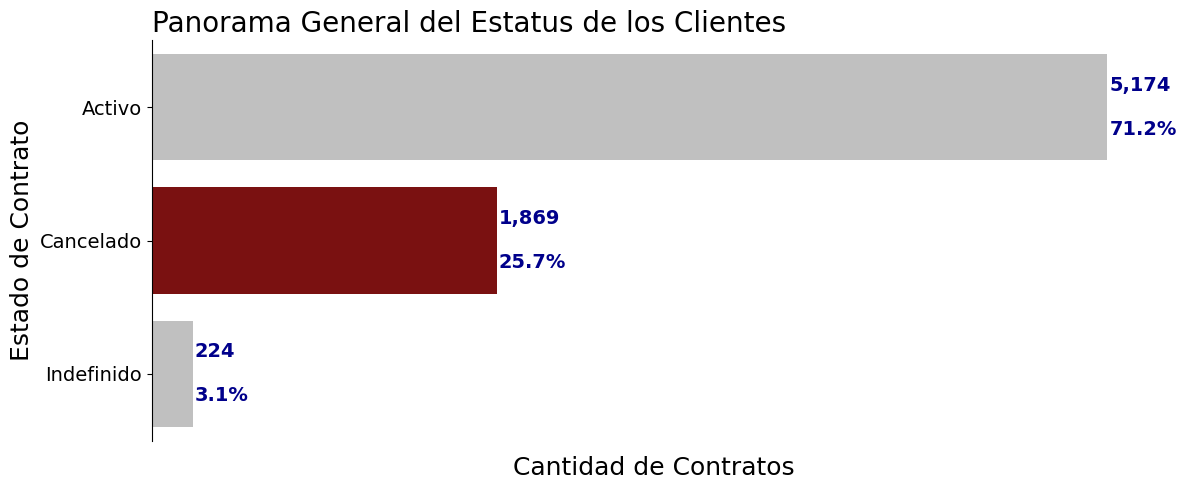

In [38]:
colores = {False:'silver',True:'darkred','':'silver'}
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title('Panorama General del Estatus de los Clientes',fontsize=20,loc='left')

ax = sns.barplot(y=values.index,x=values.values,hue=values.index,legend=False,orient='h',palette=colores)
ax.set_ylabel('Estado de Contrato',fontsize=18)
ax.set_xlabel('Cantidad de Contratos',fontsize=18)
ax.set_yticks([0,1,2])
ax.set_yticklabels(('Activo','Cancelado','Indefinido'),fontsize=14)
ax.set_xticklabels([])
ax.tick_params(axis='x',which='both',bottom=False)

for i, j in enumerate(values.values):
    ax.text(j+10,i,f'{j:,}\n\n{(j/values.sum())*100:.1f}%',fontweight='bold',color='darkblue',va='center',ha='left',fontsize=14)

ax=sns.despine(bottom=True)
fig.tight_layout()
plt.show()




#### **Analisis de variables categoricas**

In [39]:
ex_clientes = df[df['contrato_cancelado']==True]
clientes_conservados = df[df['contrato_cancelado']==False]

In [40]:
ex_clientes['genero'].value_counts()

genero
Female    939
Male      930
Name: count, dtype: int64

In [41]:
clientes_conservados['genero'].value_counts()


genero
Male      2625
Female    2549
Name: count, dtype: int64

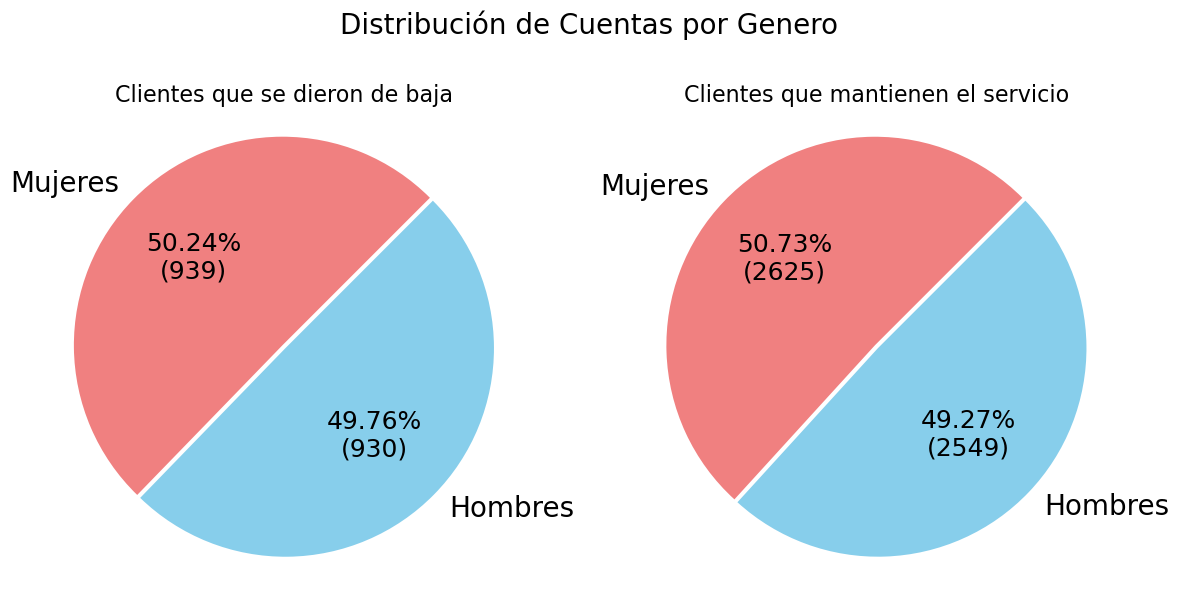

In [42]:
graficas = [ex_clientes,clientes_conservados]

fig, axs = plt.subplots(1,2,figsize=(12,6))
fig.suptitle('Distribución de Cuentas por Genero',fontsize=20)

for grafica in range(len(graficas)):
    wedges, texts, autopct_texts = axs[grafica].pie(graficas[grafica]['genero'].value_counts(),labels=['Mujeres','Hombres',],autopct='%1.2f%%',colors=['lightcoral','skyblue'],startangle=45,explode=[0.02,0])
    
    for text in texts:
        text.set_fontsize(20)

    for i,(text,wedge) in enumerate(zip(autopct_texts,wedges)):
        count = graficas[grafica]['genero'].value_counts().iloc[i]
        porcentage = text.get_text()
        text.set_text(f'{porcentage}\n({count})')
        text.set_fontsize(18)
    axs[grafica].axis('equal')
    titulo= ['Clientes que se dieron de baja','Clientes que mantienen el servicio']
    axs[grafica].set_title(f'\n{titulo[grafica]}',fontsize=16)

fig.tight_layout()
plt.show()

> Como se puede observar el genero del cliente no es un factor que influya en si mantiene o no el servicio

In [43]:
ex_clientes['tipo_contrato'].value_counts()

tipo_contrato
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64

In [44]:
clientes_conservados['tipo_contrato'].value_counts()


tipo_contrato
Month-to-month    2220
Two year          1647
One year          1307
Name: count, dtype: int64

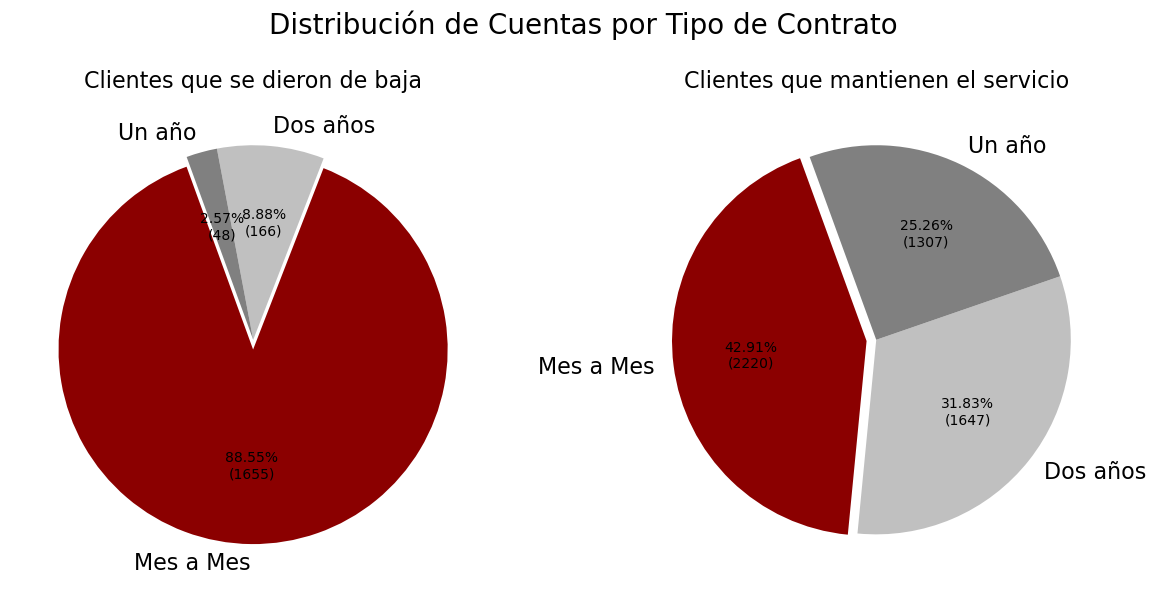

In [45]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
fig.suptitle('Distribución de Cuentas por Tipo de Contrato\n',fontsize=20)

for grafica in range(len(graficas)):
    wedges, texts, autopct_texts = axs[grafica].pie(graficas[grafica]['tipo_contrato'].value_counts(),labels=['Mes a Mes','Dos años','Un año'],autopct='%1.2f%%',colors=['darkred','silver','gray'],startangle=110,explode=[0.05,0,0.00])
    
    for text in texts:
        text.set_fontsize(16)

    for i,(text,wedge) in enumerate(zip(autopct_texts,wedges)):
        count = graficas[grafica]['tipo_contrato'].value_counts().iloc[i]
        porcentage = text.get_text()
        text.set_text(f'{porcentage}\n({count})')
        text.set_fontsize(10)
        
    # axs[grafica].axis('equal')
    titulo= ['Clientes que se dieron de baja','Clientes que mantienen el servicio']
    axs[grafica].set_title(f'{titulo[grafica]}',fontsize=16)

fig.tight_layout()
plt.show()

>Podemos observar que los clientes que contratan en modalidad de ``mes a mes`` son considerablemente mayor y al mismo tiempo, examinando la poblacion de clientes desertores, esa categoria es la que tiene un mayor numero tanto en numeros absolutos como en relacion a las otras categorias

In [46]:
ex_clientes['metodo_pago'].value_counts().sort_index()

metodo_pago
Bank transfer (automatic)     258
Credit card (automatic)       232
Electronic check             1071
Mailed check                  308
Name: count, dtype: int64

In [47]:
clientes_conservados['metodo_pago'].value_counts().sort_index()


metodo_pago
Bank transfer (automatic)    1286
Credit card (automatic)      1290
Electronic check             1294
Mailed check                 1304
Name: count, dtype: int64

In [48]:
orden_valores = graficas[0]['metodo_pago'].value_counts().sort_values().index
orden_valores

Index(['Credit card (automatic)', 'Bank transfer (automatic)', 'Mailed check',
       'Electronic check'],
      dtype='object', name='metodo_pago')

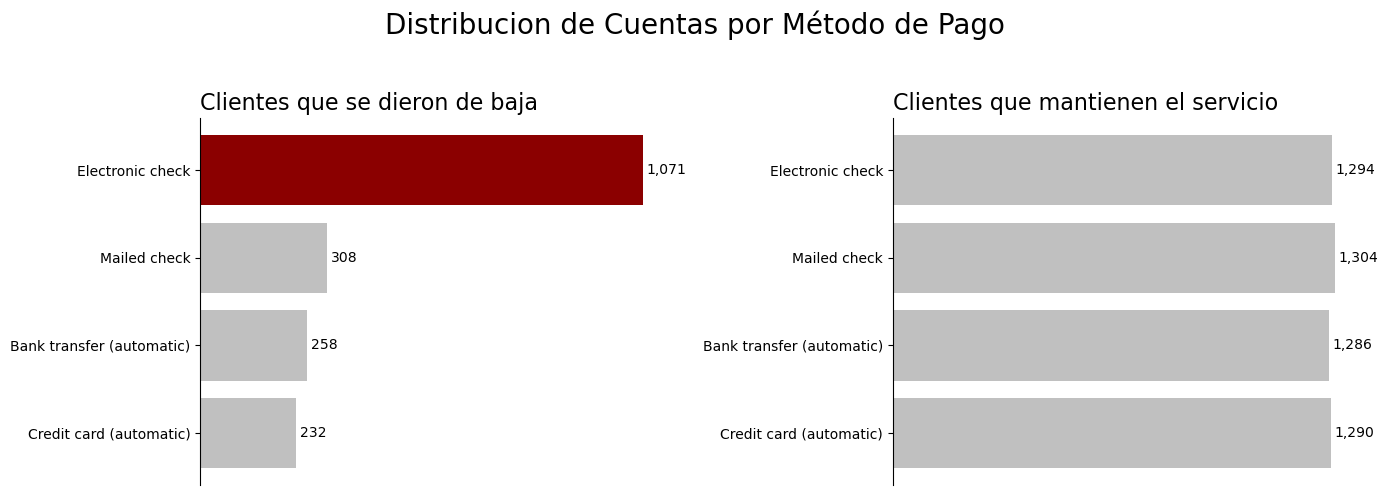

In [49]:
fig, axs = plt.subplots(1,2,figsize=(14,5))
fig.suptitle('Distribucion de Cuentas por Método de Pago\n',fontsize=20)

plt.subplots_adjust(wspace=0.5)

orden_categorias = graficas[0]['metodo_pago'].value_counts().sort_values().index
titulo= ['Clientes que se dieron de baja','Clientes que mantienen el servicio']
colores_1=['darkred' if i == graficas[0]['metodo_pago'].value_counts().idxmax() else 'silver' for i in orden_categorias]

for grafica in range(len(graficas)):
    if grafica == 0:
        colores = colores_1
    else:
        colores = ['silver']*len(orden_categorias)

    valores = graficas[grafica]['metodo_pago'].value_counts().reindex(orden_categorias,fill_value=0)
    
    axs[grafica].barh(orden_categorias, valores.values,color=colores)
    axs[grafica].set_title(titulo[grafica],fontsize=16,loc='left')
    axs[grafica].set_xticks([])
    
    for spine in ['top','bottom','right']:
        axs[grafica].spines[spine].set_visible(False)

    for i,value in enumerate(valores.values):
        axs[grafica].text(value + 10,i,f'{value:,}',va='center',ha='left')

fig.tight_layout()
plt.show()

>Se puede observar que de los 4 metodos de pago disponobles el metodo ``Electronic check`` es el que destaca por tener mayor numero de clientes que abandonaron el servicio

#### **Analisis de variables númericas**

In [50]:
numericas = df.select_dtypes(include=['int64', 'float64']).columns
print(numericas)

Index(['antiguedad(meses)', 'cargo_mensual', 'total_pagado', 'cuenta_diaria'], dtype='object')


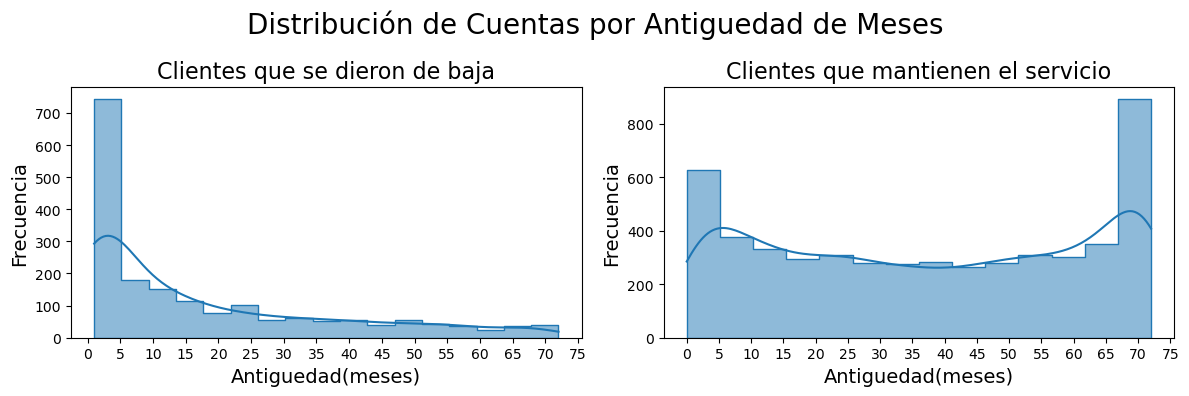

In [51]:
graficas = [ex_clientes,clientes_conservados]

fig, axs = plt.subplots(1,2,figsize=(12, 4))
plt.suptitle('Distribución de Cuentas por Antiguedad de Meses',fontsize=20)
titulo = ['Clientes que se dieron de baja','Clientes que mantienen el servicio']

for grafica in range(len(graficas)):
    sns.histplot(data=graficas[grafica], x=numericas[0], kde=True, element='step',ax=axs[grafica])
    axs[grafica].set_title(f'{titulo[grafica]}',fontsize=16)
    axs[grafica].set_xlabel(numericas[0].capitalize(),fontsize=14)
    axs[grafica].set_ylabel('Frecuencia',fontsize=14)
    axs[grafica].xaxis.set_major_locator(plt.MultipleLocator(5))

fig.tight_layout()
plt.show()

> Podemos notar como los primeros 5 meses de contratacion del servicio son criticos para poder consolidar a los clientes

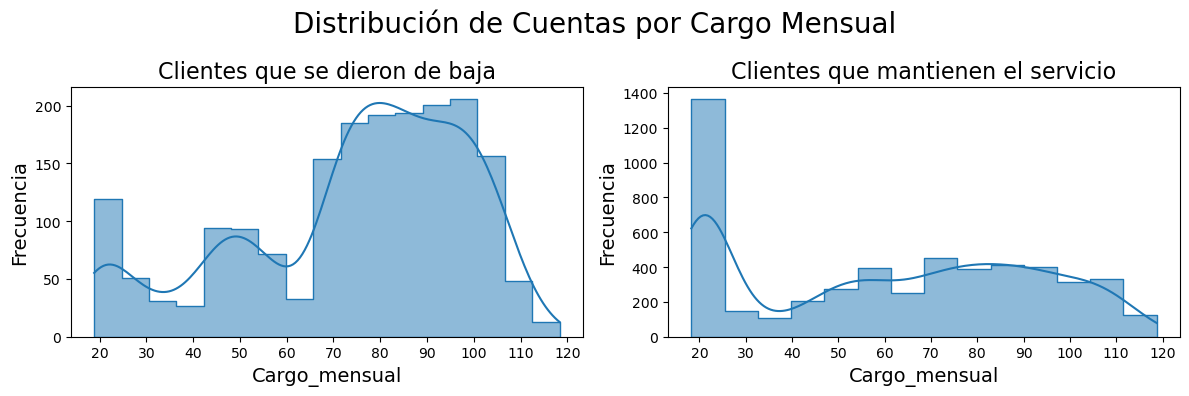

In [52]:
fig, axs = plt.subplots(1,2,figsize=(12, 4))
plt.suptitle('Distribución de Cuentas por Cargo Mensual',fontsize=20)
titulo = ['Clientes que se dieron de baja','Clientes que mantienen el servicio']

for grafica in range(len(graficas)):
    sns.histplot(data=graficas[grafica], x=numericas[1], kde=True, element='step',ax=axs[grafica])
    axs[grafica].set_title(f'{titulo[grafica]}',fontsize=16)
    axs[grafica].set_xlabel(numericas[1].capitalize(),fontsize=14)
    axs[grafica].set_ylabel('Frecuencia',fontsize=14)
    axs[grafica].xaxis.set_major_locator(plt.MultipleLocator(10))

fig.tight_layout()
plt.show()

> En este caso podemos obserbar que los clientes que aproximadamente pagan entre 70 y 105 dolares deciden dar de baja el servicio

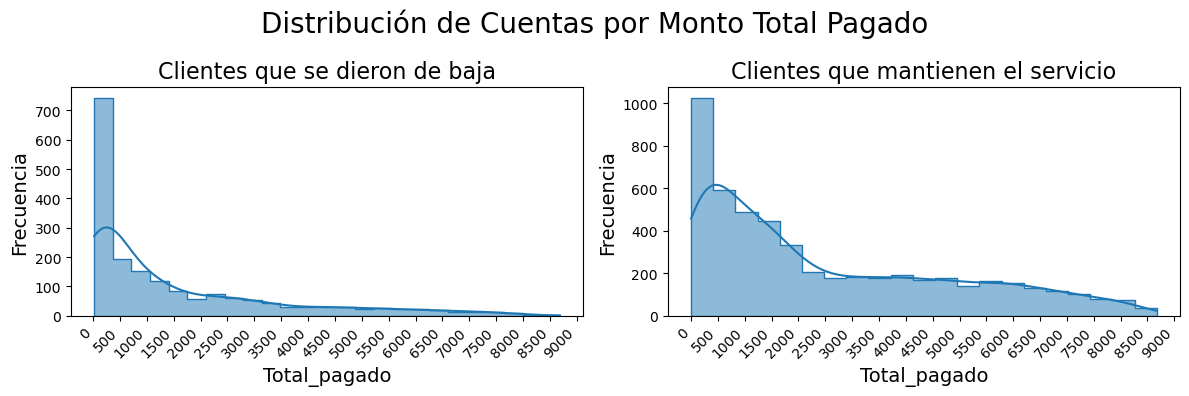

In [53]:
fig, axs = plt.subplots(1,2,figsize=(12, 4))
plt.suptitle('Distribución de Cuentas por Monto Total Pagado',fontsize=20)
titulo = ['Clientes que se dieron de baja','Clientes que mantienen el servicio']

for grafica in range(len(graficas)):
    sns.histplot(data=graficas[grafica], x=numericas[2], kde=True, element='step',ax=axs[grafica])
    axs[grafica].set_title(f'{titulo[grafica]}',fontsize=16)
    axs[grafica].set_xlabel(numericas[2].capitalize(),fontsize=14)
    axs[grafica].set_ylabel('Frecuencia',fontsize=14)
    axs[grafica].xaxis.set_major_locator(plt.MultipleLocator(500))
    plt.setp(axs[grafica].get_xticklabels(), rotation=45, ha='right',va='top')


fig.tight_layout()
plt.show()

> Aquí podemos observar como los clientes que han pagado 500 dolares o menor, son los que suelen abandonar el servicio

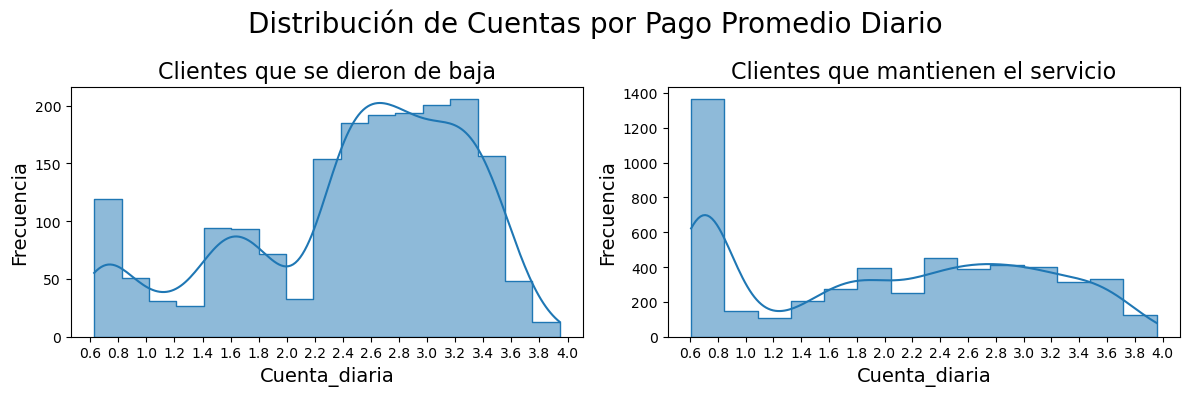

In [54]:
fig, axs = plt.subplots(1,2,figsize=(12, 4))
plt.suptitle('Distribución de Cuentas por Pago Promedio Diario',fontsize=20)
titulo = ['Clientes que se dieron de baja','Clientes que mantienen el servicio']

for grafica in range(len(graficas)):
    sns.histplot(data=graficas[grafica], x=numericas[3], kde=True, element='step',ax=axs[grafica])
    axs[grafica].set_title(f'{titulo[grafica]}',fontsize=16)
    axs[grafica].set_xlabel(numericas[3].capitalize(),fontsize=14)
    axs[grafica].set_ylabel('Frecuencia',fontsize=14)
    axs[grafica].xaxis.set_major_locator(plt.MultipleLocator(.2))

fig.tight_layout()
plt.show()

> Otra forma de ver la cantidad que suelen pagar al dia los clientes, quienes pagan entre 2.2 y 3.6 dolares diarios tienen mayor riesgo de abandonar el servicio

# **Informe Final**

### **Introduccion**

El objetivo de este análisis fue detectar los factores que influyen en la decisión de los clientes de TelecomX de abandonar los servicios a los que se encuentran suscritos y de esta forma tomar decisiones que refuercen el mantenimiento de clientes y que puedan minimizar la el abandono de los mismos.

### **Limpieza y Tratamiento de Datos**

Se obtuvieron los datos de primera mano de la API de TelecomX los cuales vienen de sus bases de datos y los cuales fueron exportados en formato JSON, una vez teniendo los datos, se realizó una transformación para poder obtener la información en formato tabular y poderlos tratar a través de un un DataFrame, se realizo una revisión exhaustiva para verificar que no hubiera datos duplicados, para evitar datos vacíos, faltantes o nulos. Se realizo una transformación de tipos de datos, para poder tratarlos, así como una traducción de las columnas para poder identificar de mejor manera los factores que se están analizando.

### **Análisis Exploratorio de Datos**

En esta sección se identificó concretamente que posibles factores podemos extraer para obtener información que sea de utilidad para nuestro objetivo.

Primeramente obtenemos un panorama general de la distribución total de los clientes, es decir, un contraste entre los clientes que conserva la empresa contra los clientes que cancelaron los servicios.

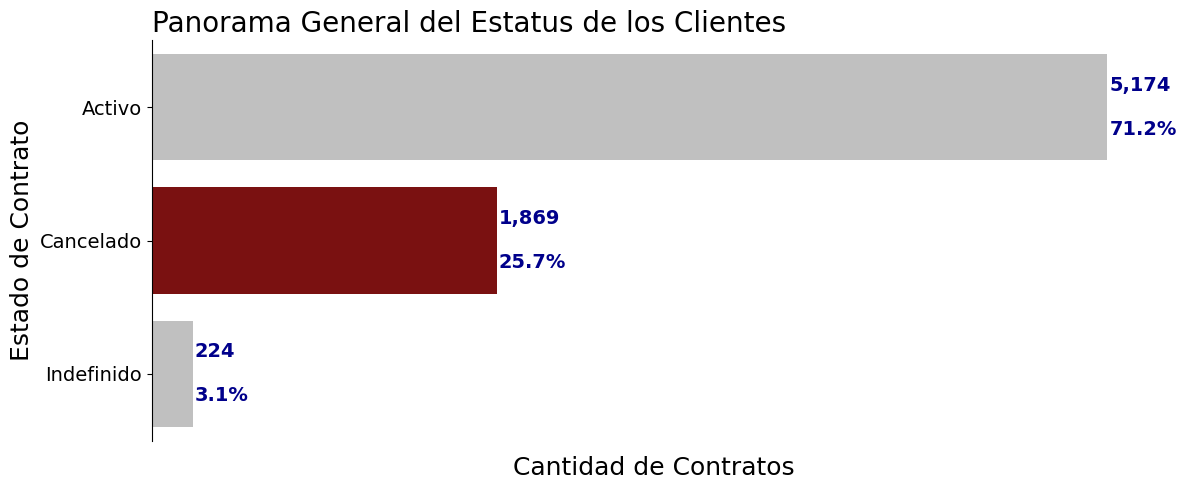

In [55]:
colores = {False:'silver',True:'darkred','':'silver'}
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title('Panorama General del Estatus de los Clientes',fontsize=20,loc='left')

ax = sns.barplot(y=values.index,x=values.values,hue=values.index,legend=False,orient='h',palette=colores)
ax.set_ylabel('Estado de Contrato',fontsize=18)
ax.set_xlabel('Cantidad de Contratos',fontsize=18)
ax.set_yticks([0,1,2])
ax.set_yticklabels(('Activo','Cancelado','Indefinido'),fontsize=14)
ax.set_xticklabels([])
ax.tick_params(axis='x',which='both',bottom=False)

for i, j in enumerate(values.values):
    ax.text(j+10,i,f'{j:,}\n\n{(j/values.sum())*100:.1f}%',fontweight='bold',color='darkblue',va='center',ha='left',fontsize=14)

ax=sns.despine(bottom=True)
fig.tight_layout()
plt.show()


> Podemos observar que una cuarta parte del total de clientes a decidido cancelar los servicios de TelecomX, este dato es importante para poder medir en un futuro si las acciones que tomemos surten ejecto y logran reducir este numero

Posteriormente analizamos las variables categoricas una por una, empezando por el genero de los clientes.

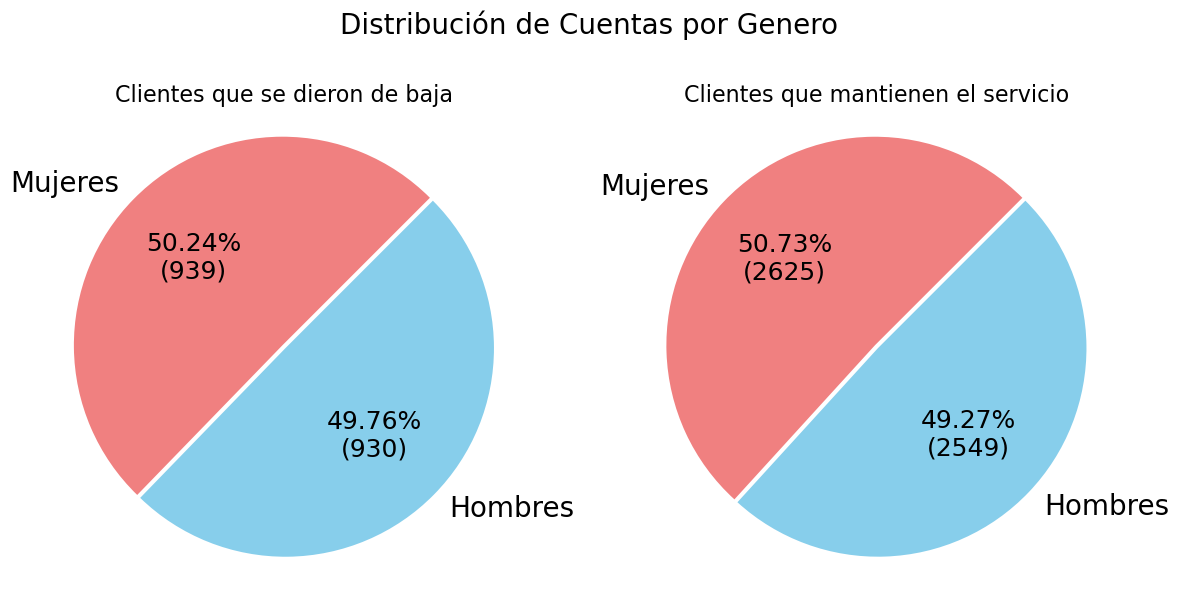

In [56]:
graficas = [ex_clientes,clientes_conservados]

fig, axs = plt.subplots(1,2,figsize=(12,6))
fig.suptitle('Distribución de Cuentas por Genero',fontsize=20)

for grafica in range(len(graficas)):
    wedges, texts, autopct_texts = axs[grafica].pie(graficas[grafica]['genero'].value_counts(),labels=['Mujeres','Hombres',],autopct='%1.2f%%',colors=['lightcoral','skyblue'],startangle=45,explode=[0.02,0])
    
    for text in texts:
        text.set_fontsize(20)

    for i,(text,wedge) in enumerate(zip(autopct_texts,wedges)):
        count = graficas[grafica]['genero'].value_counts().iloc[i]
        porcentage = text.get_text()
        text.set_text(f'{porcentage}\n({count})')
        text.set_fontsize(18)
    axs[grafica].axis('equal')
    titulo= ['Clientes que se dieron de baja','Clientes que mantienen el servicio']
    axs[grafica].set_title(f'\n{titulo[grafica]}',fontsize=16)

fig.tight_layout()
plt.show()

> Aquí podemos ver como el genero es irrelevante para nuestro estudio, ya que no se aprecian diferencias notables

Continuamos con el análisis de los cuentas de los clientes por tipo de contrato

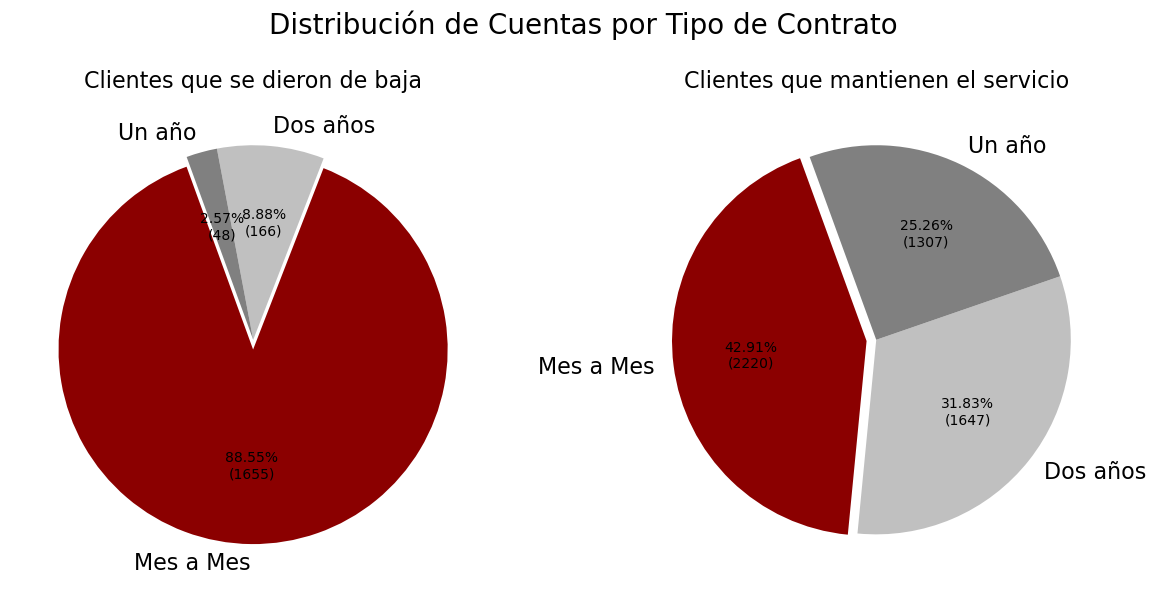

In [57]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
fig.suptitle('Distribución de Cuentas por Tipo de Contrato\n',fontsize=20)

for grafica in range(len(graficas)):
    wedges, texts, autopct_texts = axs[grafica].pie(graficas[grafica]['tipo_contrato'].value_counts(),labels=['Mes a Mes','Dos años','Un año'],autopct='%1.2f%%',colors=['darkred','silver','gray'],startangle=110,explode=[0.05,0,0.00])
    
    for text in texts:
        text.set_fontsize(16)

    for i,(text,wedge) in enumerate(zip(autopct_texts,wedges)):
        count = graficas[grafica]['tipo_contrato'].value_counts().iloc[i]
        porcentage = text.get_text()
        text.set_text(f'{porcentage}\n({count})')
        text.set_fontsize(10)
        
    # axs[grafica].axis('equal')
    titulo= ['Clientes que se dieron de baja','Clientes que mantienen el servicio']
    axs[grafica].set_title(f'{titulo[grafica]}',fontsize=16)

fig.tight_layout()
plt.show()

> Facilmente podemos ver como el tipo de contrato si influye en la deserción de los clientes, para los casos en los que eligen un contrato que se paga mensualmente. 

El siguiente análisis nos permite visualizar la distribucion de los clientes por método de pago

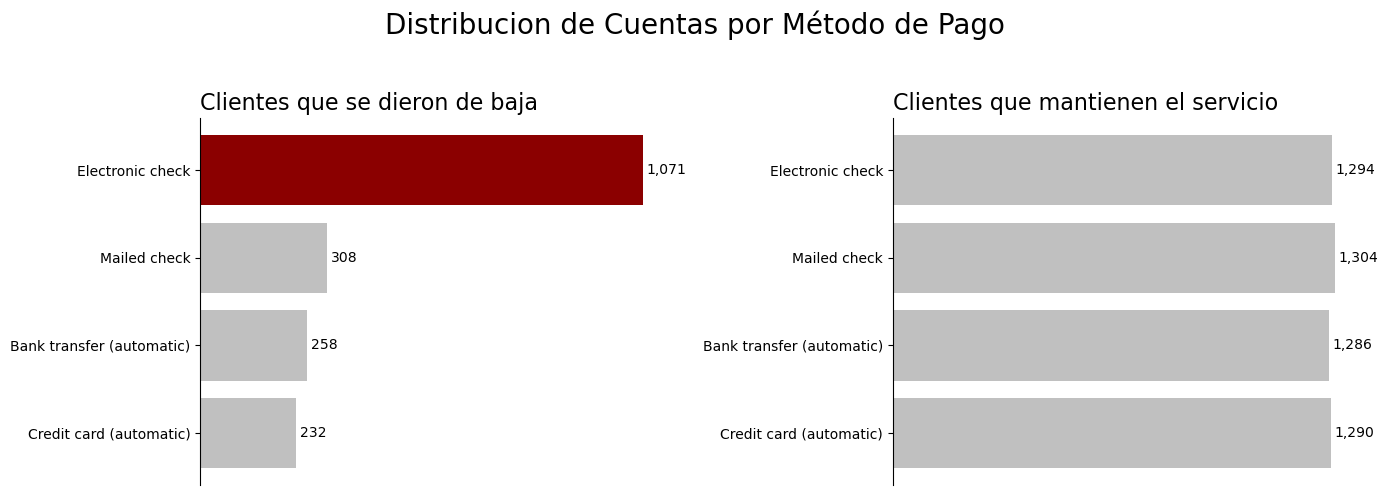

In [58]:
fig, axs = plt.subplots(1,2,figsize=(14,5))
fig.suptitle('Distribucion de Cuentas por Método de Pago\n',fontsize=20)

plt.subplots_adjust(wspace=0.5)

orden_categorias = graficas[0]['metodo_pago'].value_counts().sort_values().index
titulo= ['Clientes que se dieron de baja','Clientes que mantienen el servicio']
colores_1=['darkred' if i == graficas[0]['metodo_pago'].value_counts().idxmax() else 'silver' for i in orden_categorias]

for grafica in range(len(graficas)):
    if grafica == 0:
        colores = colores_1
    else:
        colores = ['silver']*len(orden_categorias)

    valores = graficas[grafica]['metodo_pago'].value_counts().reindex(orden_categorias,fill_value=0)
    
    axs[grafica].barh(orden_categorias, valores.values,color=colores)
    axs[grafica].set_title(titulo[grafica],fontsize=16,loc='left')
    axs[grafica].set_xticks([])
    
    for spine in ['top','bottom','right']:
        axs[grafica].spines[spine].set_visible(False)

    for i,value in enumerate(valores.values):
        axs[grafica].text(value + 10,i,f'{value:,}',va='center',ha='left')

fig.tight_layout()
plt.show()

> En este caso, descubrimos que el método de pago ``Electronic check`` es el que tiene un mayor numero de cancelaciones.

Terminando con las variable categoricas, se realizo el estudio de las variables numericas, empezando por la antiguedad en meses:

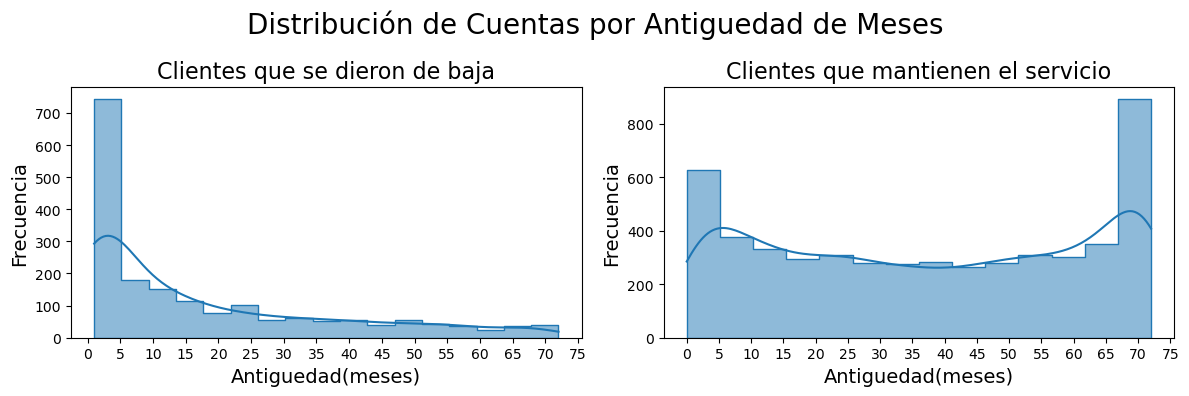

In [59]:
fig, axs = plt.subplots(1,2,figsize=(12, 4))
plt.suptitle('Distribución de Cuentas por Antiguedad de Meses',fontsize=20)
titulo = ['Clientes que se dieron de baja','Clientes que mantienen el servicio']

for grafica in range(len(graficas)):
    sns.histplot(data=graficas[grafica], x=numericas[0], kde=True, element='step',ax=axs[grafica])
    axs[grafica].set_title(f'{titulo[grafica]}',fontsize=16)
    axs[grafica].set_xlabel(numericas[0].capitalize(),fontsize=14)
    axs[grafica].set_ylabel('Frecuencia',fontsize=14)
    axs[grafica].xaxis.set_major_locator(plt.MultipleLocator(5))

fig.tight_layout()
plt.show()

> En éste análisis obtenemos otro descubrimiento interesante, ya que, podemos ver que los clientes que tienen 5 meses o menos, son los que tienen un mayor riezgo de cancelar los servicios

Continuamos con el análisis de clientes por promedio de pago mensual

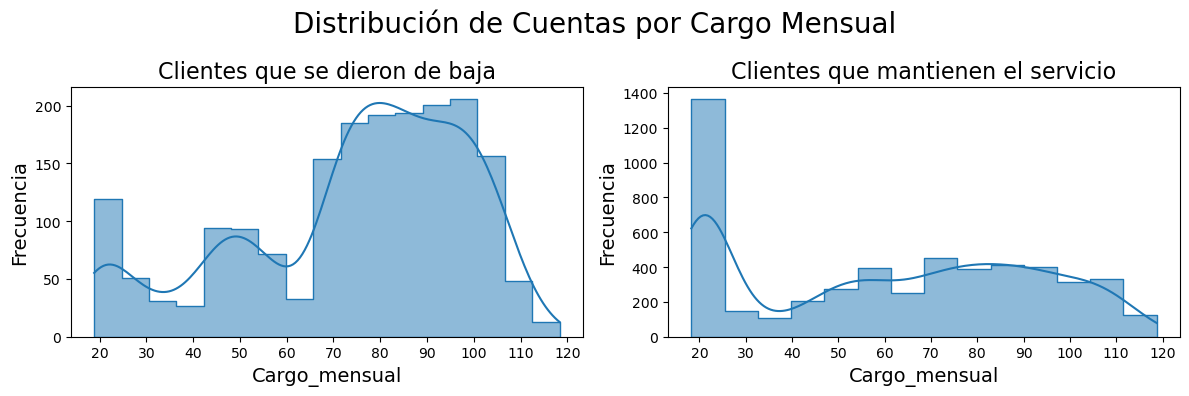

In [60]:
fig, axs = plt.subplots(1,2,figsize=(12, 4))
plt.suptitle('Distribución de Cuentas por Cargo Mensual',fontsize=20)
titulo = ['Clientes que se dieron de baja','Clientes que mantienen el servicio']

for grafica in range(len(graficas)):
    sns.histplot(data=graficas[grafica], x=numericas[1], kde=True, element='step',ax=axs[grafica])
    axs[grafica].set_title(f'{titulo[grafica]}',fontsize=16)
    axs[grafica].set_xlabel(numericas[1].capitalize(),fontsize=14)
    axs[grafica].set_ylabel('Frecuencia',fontsize=14)
    axs[grafica].xaxis.set_major_locator(plt.MultipleLocator(10))

fig.tight_layout()
plt.show()

> En este caso tenemos una rango que podriamos evitar, ya que los clientes que mas suelen cancelar pagan entre 65 y 105 dolares mensuales

En el siguiente análisis podemos visualizar la distribucion del total pagado por los clientes

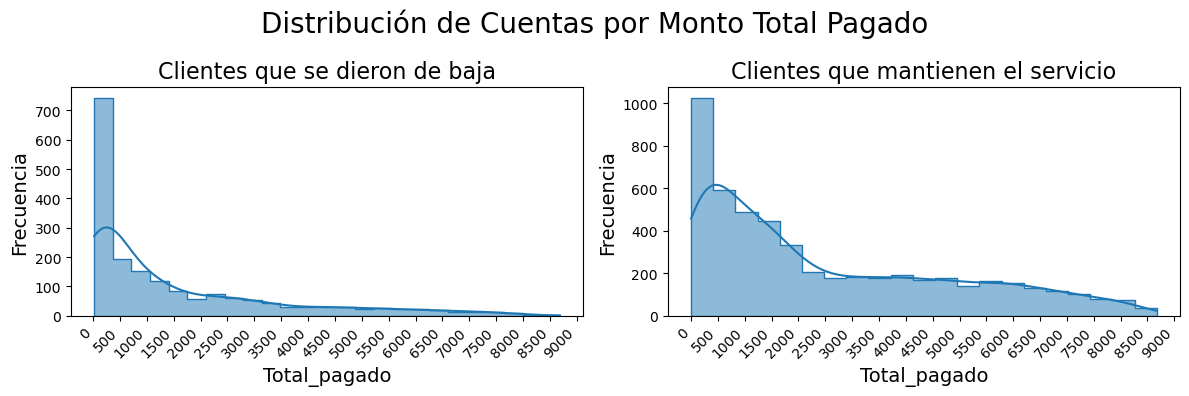

In [61]:
fig, axs = plt.subplots(1,2,figsize=(12, 4))
plt.suptitle('Distribución de Cuentas por Monto Total Pagado',fontsize=20)
titulo = ['Clientes que se dieron de baja','Clientes que mantienen el servicio']

for grafica in range(len(graficas)):
    sns.histplot(data=graficas[grafica], x=numericas[2], kde=True, element='step',ax=axs[grafica])
    axs[grafica].set_title(f'{titulo[grafica]}',fontsize=16)
    axs[grafica].set_xlabel(numericas[2].capitalize(),fontsize=14)
    axs[grafica].set_ylabel('Frecuencia',fontsize=14)
    axs[grafica].xaxis.set_major_locator(plt.MultipleLocator(500))
    plt.setp(axs[grafica].get_xticklabels(), rotation=45, ha='right',va='top')


fig.tight_layout()
plt.show()

> Está visualización es interesante, ya que aparentemente la distribucion para los casos en los que se realizó la cancelación del servicio y los que lo mantienen es muy similar, sin embargo, podemos destacar que los clientes suelen cancelar antes de llegar a pagar 500 dolares y al mismo tiempo la mayoria de los clientes actuales se encuentra en ese rango, por lo que es un punto crítico que habría que revisar.

En el siguiente caso revisamos el pago promedio diario de los clientes:

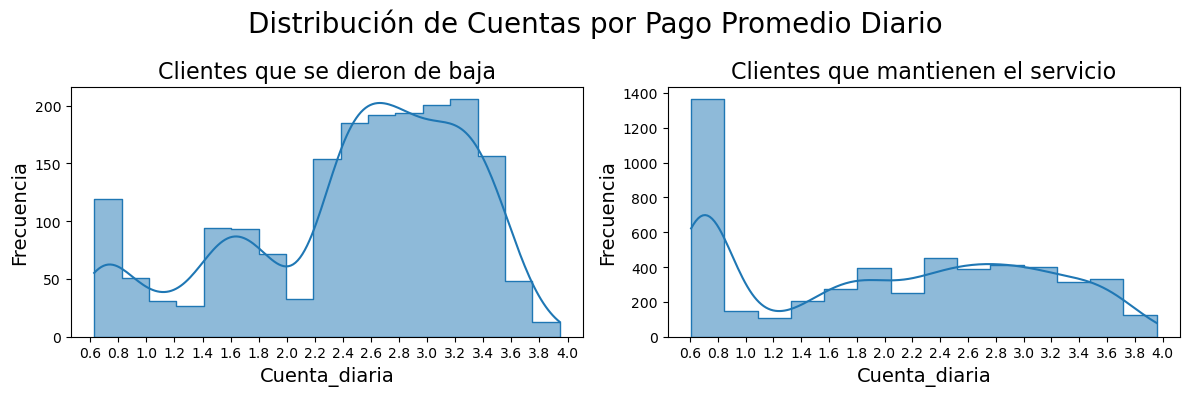

In [62]:
fig, axs = plt.subplots(1,2,figsize=(12, 4))
plt.suptitle('Distribución de Cuentas por Pago Promedio Diario',fontsize=20)
titulo = ['Clientes que se dieron de baja','Clientes que mantienen el servicio']

for grafica in range(len(graficas)):
    sns.histplot(data=graficas[grafica], x=numericas[3], kde=True, element='step',ax=axs[grafica])
    axs[grafica].set_title(f'{titulo[grafica]}',fontsize=16)
    axs[grafica].set_xlabel(numericas[3].capitalize(),fontsize=14)
    axs[grafica].set_ylabel('Frecuencia',fontsize=14)
    axs[grafica].xaxis.set_major_locator(plt.MultipleLocator(.2))

fig.tight_layout()
plt.show()

> Similar al pago mensual, en este caso podemos ver que entre 2.2 y 3.6 dolares diarios es la franja en la que existen mas bajas

### **Conclusiones**

**En está sección haremos un recuento de los insights mas reveladores**

- Una cuarta parte del total de clientes a decidido cancelar los servicios de TelecomX
- Un 88% del total de deserciones son con un plan de pagos mensual
- El 57% de cancelaciones son con el metodo de pago ``Electronic check``
- Los clientes que tienen 5 meses o menos, son los que tienen un mayor riezgo de cancelar los servicios
- Los clientes que mas suelen cancelar pagan entre 65 y 105 dolares mensuales
- Los clientes suelen cancelar antes de llegar a pagar 500 dolares 
- La mayoria de los clientes actuales se esta por pagar 500 dolares
- Los clientes que pagan entre 2.2 y 3.6 dolares diarios tienen mayor probabilidad de dar de baja el servicio

### **Recomendaciones**

Acciones que se podrian tomar para reducir el numero de cancelaciones.
- Obtener contratos por por año o mas para nuevos clientes
- Promociones o beneficios exclusivos para clientes que cambien su contrato a un año o mas 
- Promover el pago autmatico ya sea por transferencia o por tarjeta de credito, ya que estos metodos de pago tienen menor cantidad de cancelaciones
- Revisar si existen problemas con el metodo de pago ``Electronic check`` y de existir, mejorar la experiencia de usuarios
- Promociones con expansion de contrato al cuarto mes para quienes tienen contratos mensuales
- Investigar a la competencia y ver que productos o paquetes ofrecen entre 65 a 105 dolares. Es posible que ofrezcan un producto similar con que se esta compitiendo, buscar mejorar a lo ofrecido por la competencia
- Tener claro el punto de retorno de un cliente, es decir, tener el punto de apartir de que tiempo un cliente ya nos da retorno de utilidad y establecer metricas para que cada cliente llegue por minimo a ese punto